
Results of lnVCR Analysis:
                             Group      CV     VCR   lnVCR      SE  CI_lower  \
0        Schizophrenia Unspecified  0.6300  1.3084  0.2688  0.0221    0.2254   
1      First Episode Schizophrenia  0.5619  1.1669  0.1544  0.0348    0.0863   
2       Schizophrenia in Remission  0.5764  1.1970  0.1799  0.0245    0.1318   
3  Schizophrenia without Remission  0.5062  1.0513  0.0500  0.0289   -0.0066   

   CI_upper  z_score  p_value  
0    0.3122  12.1445   0.0000  
1    0.2225   4.4418   0.0000  
2    0.2279   7.3375   0.0000  
3    0.1066   1.7322   0.0832  


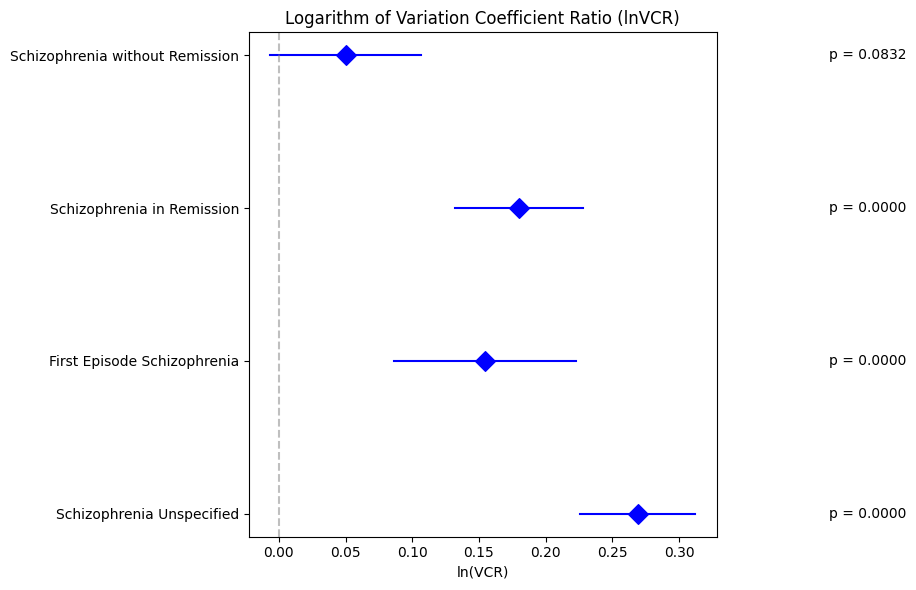

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def calculate_lnVCR(means, sds, control_mean, control_sd, ns, control_n, groups):
   """
   Calculate lnVCR and its confidence intervals

   Parameters:
   -----------
   means : array-like
       Mean values for each group
   sds : array-like
       Standard deviations for each group
   control_mean : float
       Mean of control group
   control_sd : float
       Standard deviation of control group
   ns : array-like
       Sample sizes for each group
   control_n : int
       Sample size of control group
   groups : list
       Names of groups

   Returns:
   --------
   pd.DataFrame with results
   """
   # Calculating CV (Coefficient of Variation)
   cvs = sds / means
   cv_control = control_sd / control_mean

   # Calculating VCR
   vcr = cvs / cv_control

   # Calculate lnVCR
   lnvcr = np.log(vcr)

   # SE for lnVCR
   # Formula: sqrt(1/(2(n1-1)) + 1/(2(n2-1)))
   se_lnvcr = np.sqrt(1/(2*(ns-1)) + 1/(2*(control_n-1)))

   # 95% CI
   ci_lower = lnvcr - 1.96 * se_lnvcr
   ci_upper = lnvcr + 1.96 * se_lnvcr

   # z-scores
   z_scores = lnvcr / se_lnvcr

   # p-values
   p_values = 2 * (1 - stats.norm.cdf(abs(z_scores)))

   # Creating results DataFrame
   results = pd.DataFrame({
       'Group': groups,
       'CV': cvs,
       'VCR': vcr,
       'lnVCR': lnvcr,
       'SE': se_lnvcr,
       'CI_lower': ci_lower,
       'CI_upper': ci_upper,
       'z_score': z_scores,
       'p_value': p_values
   })

   return results

# Our data
groups = ['Schizophrenia Unspecified', 'First Episode Schizophrenia',
         'Schizophrenia in Remission', 'Schizophrenia without Remission']
means = np.array([2.27, 1.94, 2.03, 2.43])
sds = np.array([1.43, 1.09, 1.17, 1.23])
ns = np.array([9148, 648, 3019, 1256])
control_mean = 1.62
control_sd = 0.78
control_n = 1150

# Calculating lnVCR
results = calculate_lnVCR(means, sds, control_mean, control_sd, ns, control_n, groups)

# Print results
print("\nResults of lnVCR Analysis:")
print(results.round(4))

def plot_lnVCR(results):
   fig, ax = plt.subplots(figsize=(10, 6))

   # Plot data points and CIs
   y_positions = np.arange(len(results))
   ax.scatter(results['lnVCR'], y_positions, color='blue', marker='D', s=100)

   # Plot CIs
   for i, (lower, upper) in enumerate(zip(results['CI_lower'], results['CI_upper'])):
       ax.plot([lower, upper], [i, i], color='blue')

   # Customize plot
   ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
   ax.set_yticks(y_positions)
   ax.set_yticklabels(results['Group'])
   ax.set_xlabel('ln(VCR)')
   ax.set_title('Logarithm of Variation Coefficient Ratio (lnVCR)')

   # Add annotations
   for i, (vcr, p) in enumerate(zip(results['lnVCR'], results['p_value'])):
       ax.text(max(results['CI_upper']) + 0.1, i,
               f'p = {p:.4f}',
               verticalalignment='center')

   plt.tight_layout()
   return fig

# Create plot
fig = plot_lnVCR(results)
plt.show()

# Save results to CSV
results.to_csv('lnVCR_results.csv', index=False)

#lnVCR table version

<ipython-input-17-647160eff89b>:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


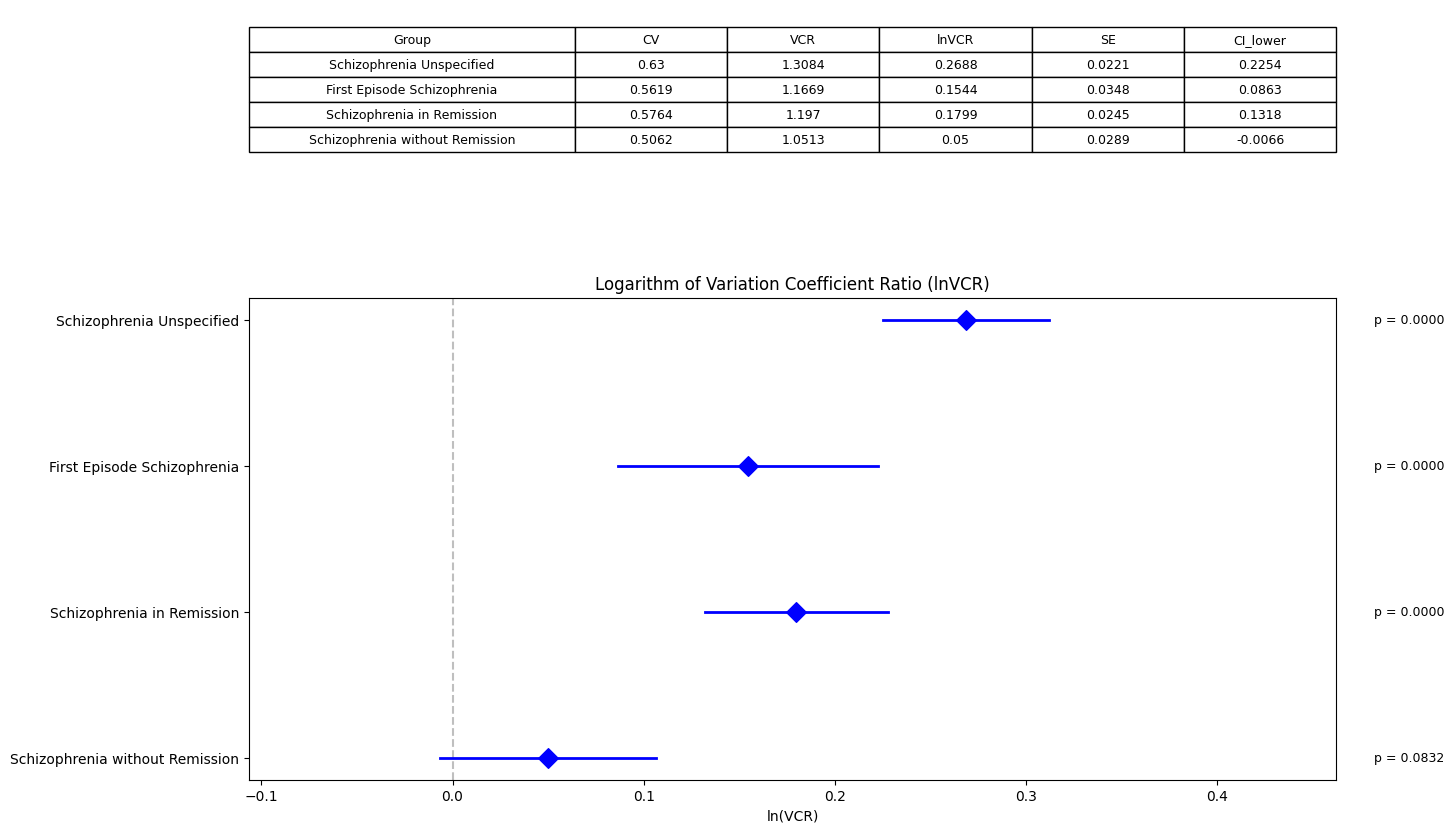

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create the data with exact matching column names
data = {
    'Group': [
        'Schizophrenia Unspecified',
        'First Episode Schizophrenia',
        'Schizophrenia in Remission',
        'Schizophrenia without Remission'
    ],
    'CV': [0.63, 0.5619, 0.5764, 0.5062],
    'VCR': [1.3084, 1.1669, 1.197, 1.0513],
    'lnVCR': [0.2688, 0.1544, 0.1799, 0.05],
    'SE': [0.0221, 0.0348, 0.0245, 0.0289],
    'CI_lower': [0.2254, 0.0863, 0.1318, -0.0066],
    'CI_upper': [0.3122, 0.2225, 0.2280, 0.1066],
    'p_value': [0.0000, 0.0000, 0.0000, 0.0832]
}

# Create DataFrame
results = pd.DataFrame(data)

# Define plotting function
def create_combined_lnvcr_plot(results):
    # Create figure
    fig, (ax_table, ax_forest) = plt.subplots(
        2, 1,
        figsize=(15, 10),
        height_ratios=[0.25, 0.75],
        gridspec_kw={'hspace': 0.4}
    )

    # Create table data with exact column names
    cols_for_table = ['Group', 'CV', 'VCR', 'lnVCR', 'SE', 'CI_lower']
    table_data = results[cols_for_table].copy()
    table = ax_table.table(
        cellText=table_data.values,
        colLabels=cols_for_table,
        loc='center',
        cellLoc='center'
    )

    # Format table
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.5, 1.5)

    # Set column widths
    col_widths = [0.3, 0.14, 0.14, 0.14, 0.14, 0.14]
    for (i, j), cell in table.get_celld().items():
        cell.set_width(col_widths[j])

    ax_table.axis('off')

    # Create forest plot
    y_positions = np.arange(len(results))[::-1]
    x_min = min(results['CI_lower']) - 0.1
    x_max = max(results['CI_upper']) + 0.15

    ax_forest.axvline(x=0, color='gray', linestyle='--', alpha=0.5)

    # Add confidence intervals
    for i, (lower, upper) in enumerate(zip(results['CI_lower'], results['CI_upper'])):
        ax_forest.plot([lower, upper], [y_positions[i], y_positions[i]], color='blue', linewidth=2)

    # Add data points
    ax_forest.scatter(results['lnVCR'], y_positions, color='blue', marker='D', s=100)

    # Format forest plot
    ax_forest.set_yticks(y_positions)
    ax_forest.set_yticklabels(results['Group'])
    ax_forest.set_xlabel('ln(VCR)')
    ax_forest.set_title('Logarithm of Variation Coefficient Ratio (lnVCR)')
    ax_forest.set_xlim(x_min, x_max)

    # Add p-values
    for i, p in enumerate(results['p_value']):
        ax_forest.text(x_max + 0.02, y_positions[i],
                      f'p = {p:.4f}',
                      verticalalignment='center',
                      fontsize=9)

    plt.tight_layout()
    fig.subplots_adjust(right=0.85)

    return fig

# Create and show plot
fig = create_combined_lnvcr_plot(results)
plt.show()

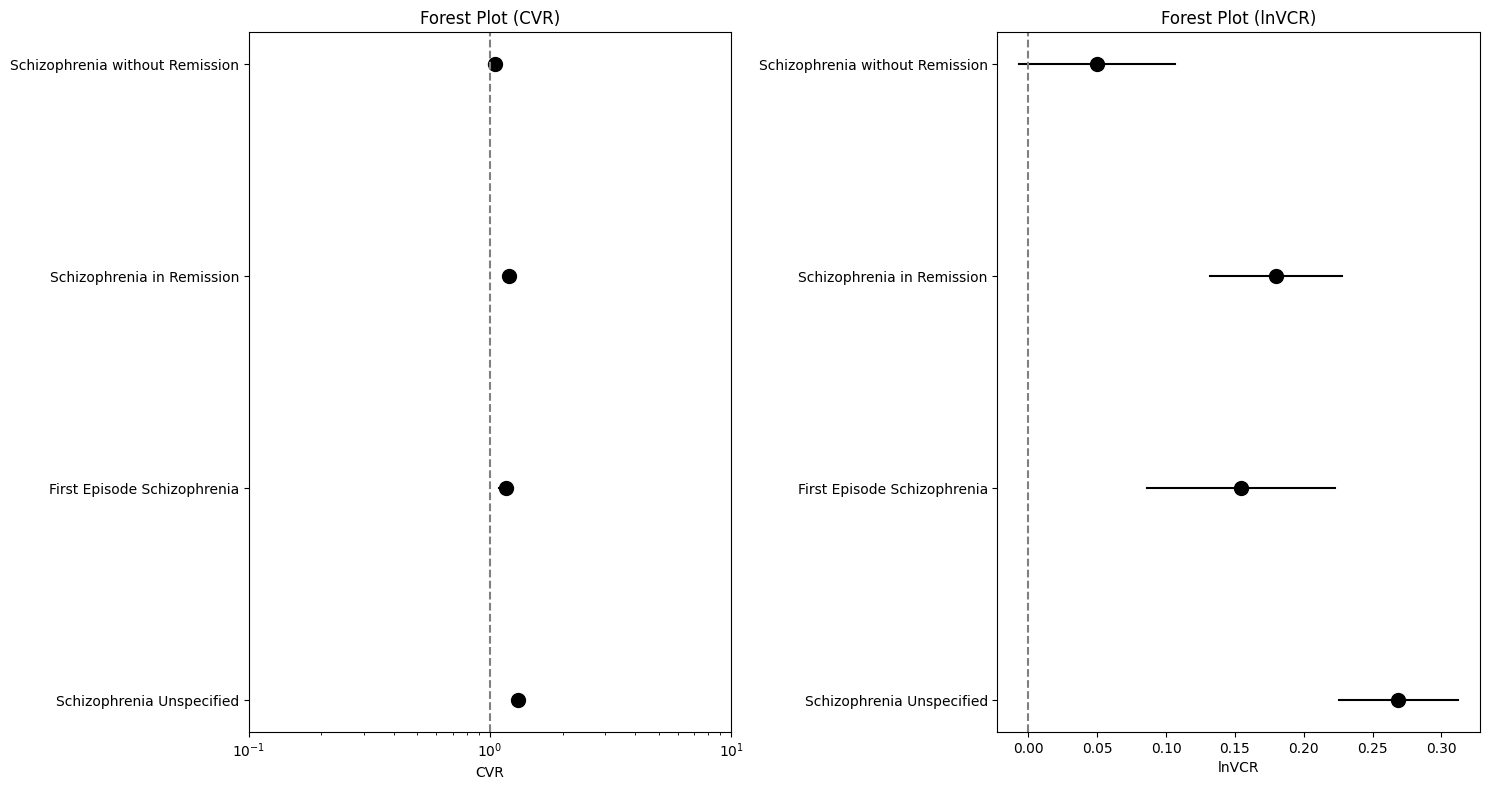

In [ ]:
def calculate_and_plot_both(means, sds, control_mean, control_sd, ns, control_n, groups):
    # Calculate CVR and lnVCR
    cvs = sds / means
    cv_control = control_sd / control_mean
    vcr = cvs / cv_control
    lnvcr = np.log(vcr)

    # Calculate SEs
    se_lnvcr = np.sqrt(1/(2*(ns-1)) + 1/(2*(control_n-1)))

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

    # Plot CVR (first subplot)
    y_positions = np.arange(len(groups))

    # CVR plot
    ci_lower_cvr = np.exp(lnvcr - 1.96 * se_lnvcr)
    ci_upper_cvr = np.exp(lnvcr + 1.96 * se_lnvcr)

    for i, (lower, upper) in enumerate(zip(ci_lower_cvr, ci_upper_cvr)):
        ax1.plot([lower, upper], [i, i], color='black')
    ax1.scatter(vcr, y_positions, color='black', s=100)

    ax1.set_xscale('log')
    ax1.set_xlim(0.1, 10)
    ax1.axvline(x=1, color='gray', linestyle='--')
    ax1.set_yticks(y_positions)
    ax1.set_yticklabels(groups)
    ax1.set_xlabel('CVR')
    ax1.set_title('Forest Plot (CVR)')

    # lnVCR plot
    ci_lower_ln = lnvcr - 1.96 * se_lnvcr
    ci_upper_ln = lnvcr + 1.96 * se_lnvcr

    for i, (lower, upper) in enumerate(zip(ci_lower_ln, ci_upper_ln)):
        ax2.plot([lower, upper], [i, i], color='black')
    ax2.scatter(lnvcr, y_positions, color='black', s=100)

    ax2.axvline(x=0, color='gray', linestyle='--')
    ax2.set_yticks(y_positions)
    ax2.set_yticklabels(groups)
    ax2.set_xlabel('lnVCR')
    ax2.set_title('Forest Plot (lnVCR)')

    plt.tight_layout()
    return fig

# Your data
groups = ['Schizophrenia Unspecified',
          'First Episode Schizophrenia',
          'Schizophrenia in Remission',
          'Schizophrenia without Remission']
means = np.array([2.27, 1.94, 2.03, 2.43])
sds = np.array([1.43, 1.09, 1.17, 1.23])
ns = np.array([9148, 648, 3019, 1256])
control_mean = 1.62
control_sd = 0.78
control_n = 1150

fig = calculate_and_plot_both(means, sds, control_mean, control_sd, ns, control_n, groups)
plt.show()

# computing AIC & BIC for lnVCR
## model comparison

In [ ]:
def compare_with_null_model(means, sds, ns, control_mean, control_sd, control_n):
    # Calculate observed lnVCR
    cvs = sds / means
    cv_control = control_sd / control_mean
    vcr = cvs / cv_control
    lnvcr = np.log(vcr)

    # Calculate SE
    se_lnvcr = np.sqrt(1/(2*(ns-1)) + 1/(2*(control_n-1)))

    # Log-likelihood for null model (lnVCR = 0)
    ll_null = -sum((lnvcr)**2 / (2*se_lnvcr**2))

    # Log-likelihood for observed data
    ll_obs = -sum((lnvcr - np.mean(lnvcr))**2 / (2*se_lnvcr**2))

    # Calculate AIC and BIC
    k_null = 1  # parameters in null model
    k_obs = 2   # parameters in observed model
    n = len(means)

    AIC_null = 2*k_null - 2*ll_null
    BIC_null = np.log(n)*k_null - 2*ll_null

    AIC_obs = 2*k_obs - 2*ll_obs
    BIC_obs = np.log(n)*k_obs - 2*ll_obs

    # Chi-square test
    chi_sq = -2*(ll_null - ll_obs)
    p_value = 1 - stats.chi2.cdf(chi_sq, df=k_obs-k_null)

    return pd.DataFrame({
        'Model': ['Null', 'Observed'],
        'AIC': [AIC_null, AIC_obs],
        'BIC': [BIC_null, BIC_obs],
        'LogLik': [ll_null, ll_obs]
    }), p_value

# Using our data
results, p_value = compare_with_null_model(means, sds, ns, control_mean, control_sd, control_n)
print("\nModel Comparison:")
print(results)
print(f"\np-value for model comparison: {p_value:.4f}")


Model Comparison:
      Model         AIC         BIC      LogLik
0      Null  226.057784  225.444078 -112.028892
1  Observed   42.643175   41.415763  -19.321587

p-value for model comparison: 0.0000


# Computing AIC & BIC for SMD

## Model Comparison


Model Comparison for Mean Differences:
      Model          AIC          BIC      LogLik
0      Null  1156.310508  1155.696802 -577.155254
1  Observed    98.858919    97.631508  -47.429460

p-value for model comparison: 0.0000


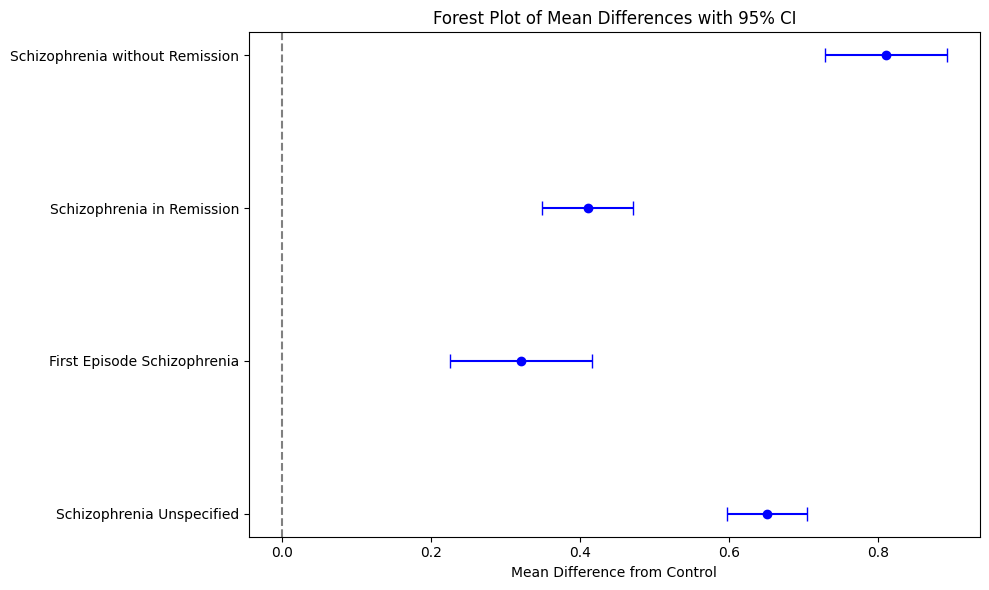

In [ ]:
def compare_means_models(means, sds, ns, control_mean, control_sd, control_n):
    """
    Compare models for mean differences using AIC/BIC
    """
    # Calculate mean differences and their SE
    mean_diff = means - control_mean
    se_diff = np.sqrt(sds**2/ns + control_sd**2/control_n)

    # Log-likelihood for null model (mean_diff = 0)
    ll_null = -sum((mean_diff)**2 / (2*se_diff**2))

    # Log-likelihood for observed data
    ll_obs = -sum((mean_diff - np.mean(mean_diff))**2 / (2*se_diff**2))

    # Calculate AIC and BIC
    k_null = 1  # parameters in null model
    k_obs = 2   # parameters in observed model
    n = len(means)

    AIC_null = 2*k_null - 2*ll_null
    BIC_null = np.log(n)*k_null - 2*ll_null

    AIC_obs = 2*k_obs - 2*ll_obs
    BIC_obs = np.log(n)*k_obs - 2*ll_obs

    # Chi-square test
    chi_sq = -2*(ll_null - ll_obs)
    p_value = 1 - stats.chi2.cdf(chi_sq, df=k_obs-k_null)

    results = pd.DataFrame({
        'Model': ['Null', 'Observed'],
        'AIC': [AIC_null, AIC_obs],
        'BIC': [BIC_null, BIC_obs],
        'LogLik': [ll_null, ll_obs]
    })

    return results, p_value, mean_diff, se_diff

# Using our data
results_means, p_value_means, mean_diff, se_diff = compare_means_models(
    means, sds, ns, control_mean, control_sd, control_n
)

print("\nModel Comparison for Mean Differences:")
print(results_means)
print(f"\np-value for model comparison: {p_value_means:.4f}")

# Visualization of mean differences
plt.figure(figsize=(10, 6))
y_positions = np.arange(len(groups))

# Plot mean differences
plt.errorbar(mean_diff, y_positions, xerr=1.96*se_diff,
            fmt='o', color='blue', capsize=5)

plt.axvline(x=0, color='gray', linestyle='--')
plt.yticks(y_positions, groups)
plt.xlabel('Mean Difference from Control')
plt.title('Forest Plot of Mean Differences with 95% CI')

plt.tight_layout()
plt.show()

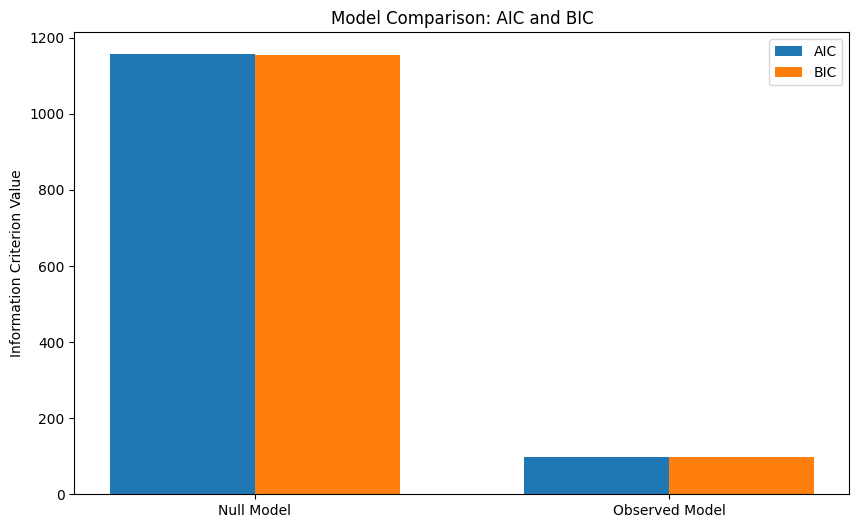

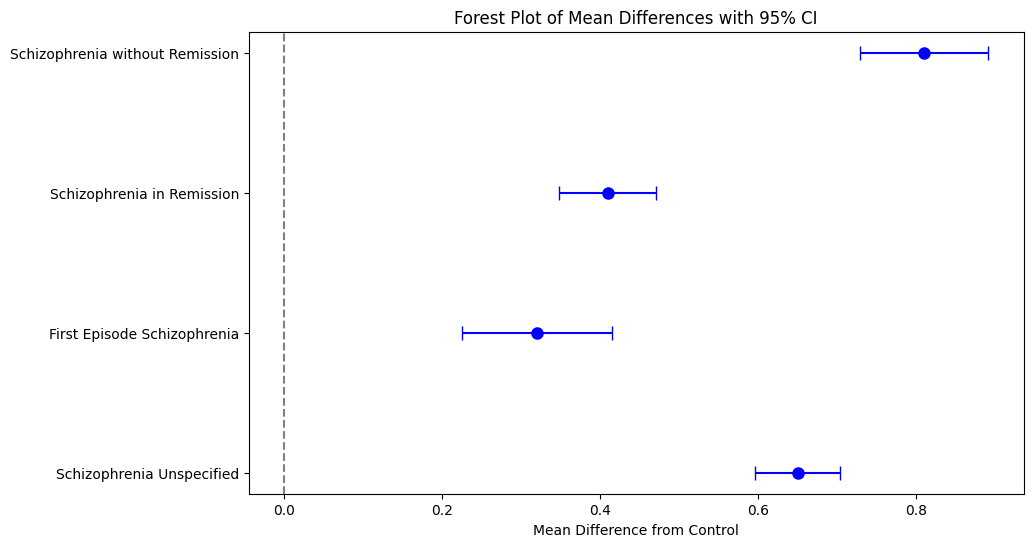


Model Comparison Results:
      Model          AIC          BIC      LogLik
0      Null  1156.310508  1155.696802 -577.155254
1  Observed    98.858919    97.631508  -47.429460

p-value for model comparison: 0.0000


In [9]:
def compare_means_models(means, sds, ns, control_mean, control_sd, control_n):
    # Original calculations remain the same
    mean_diff = means - control_mean
    se_diff = np.sqrt(sds**2/ns + control_sd**2/control_n)
    ll_null = -sum((mean_diff)**2 / (2*se_diff**2))
    ll_obs = -sum((mean_diff - np.mean(mean_diff))**2 / (2*se_diff**2))
    k_null = 1
    k_obs = 2
    n = len(means)
    AIC_null = 2*k_null - 2*ll_null
    BIC_null = np.log(n)*k_null - 2*ll_null
    AIC_obs = 2*k_obs - 2*ll_obs
    BIC_obs = np.log(n)*k_obs - 2*ll_obs
    chi_sq = -2*(ll_null - ll_obs)
    p_value = 1 - stats.chi2.cdf(chi_sq, df=k_obs-k_null)

    results = pd.DataFrame({
        'Model': ['Null', 'Observed'],
        'AIC': [AIC_null, AIC_obs],
        'BIC': [BIC_null, BIC_obs],
        'LogLik': [ll_null, ll_obs]
    })

    # Model comparison plot
    plt.figure(figsize=(10, 6))
    x = np.arange(2)
    width = 0.35
    plt.bar(x - width/2, results.AIC, width, label='AIC')
    plt.bar(x + width/2, results.BIC, width, label='BIC')
    plt.xticks(x, ['Null Model', 'Observed Model'])
    plt.ylabel('Information Criterion Value')
    plt.title('Model Comparison: AIC and BIC')
    plt.legend()
    plt.show()

    # Mean differences plot
    plt.figure(figsize=(10, 6))
    y_positions = np.arange(len(groups))
    plt.errorbar(mean_diff, y_positions, xerr=1.96*se_diff,
                fmt='o', color='blue', capsize=5, markersize=8)
    plt.axvline(x=0, color='gray', linestyle='--')
    plt.yticks(y_positions, groups)
    plt.xlabel('Mean Difference from Control')
    plt.title('Forest Plot of Mean Differences with 95% CI')
    plt.show()

    return results, p_value, mean_diff, se_diff

# Run analysis
results, p_value, mean_diff, se_diff = compare_means_models(
    means, sds, ns, control_mean, control_sd, control_n
)

# Print numerical results
print("\nModel Comparison Results:")
print(results)
print(f"\np-value for model comparison: {p_value:.4f}")

#Effect Size Heterogeneity Analysis

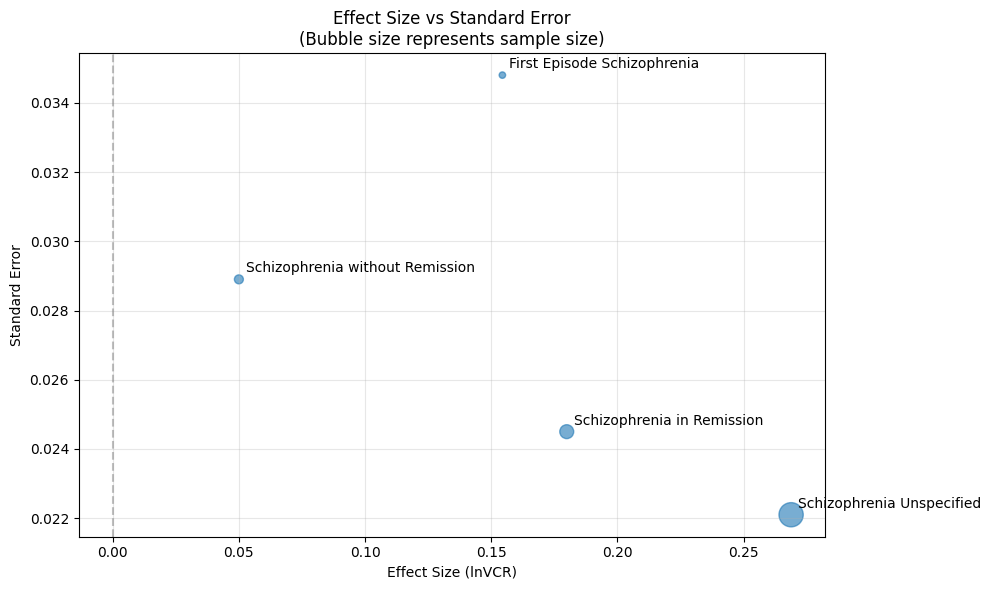

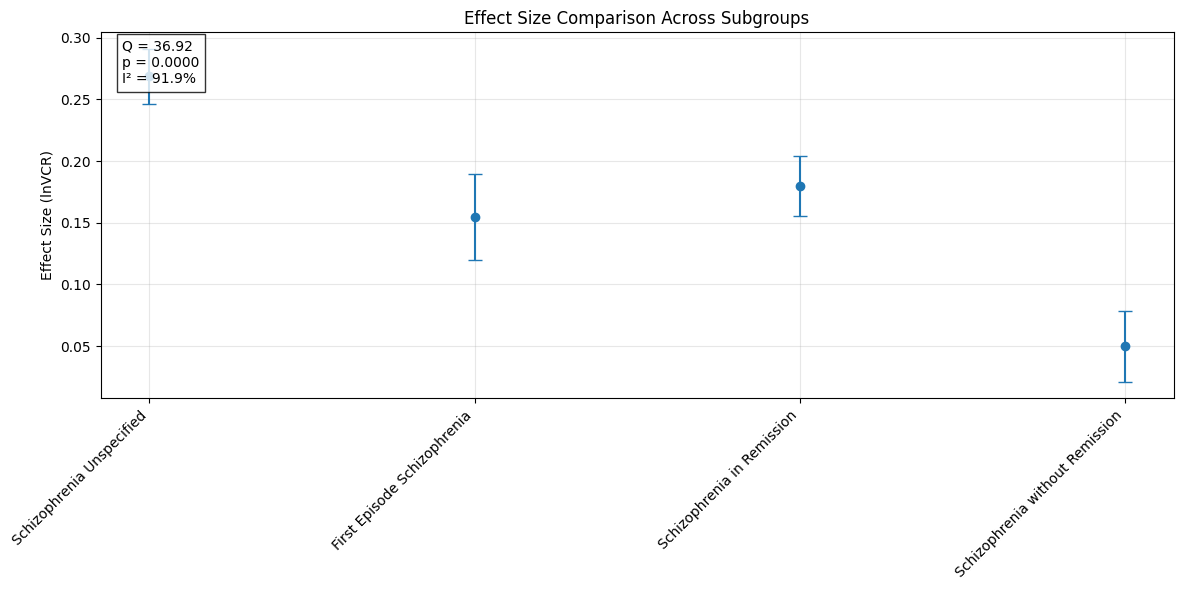


Heterogeneity Statistics:
Q statistic: 36.92
p-value: 0.0000
I² value: 91.9%
Degrees of freedom: 3


In [ ]:
# Calculate heterogeneity stats first
def calculate_heterogeneity_stats(effect_sizes, standard_errors, ns):
    weights = 1 / (standard_errors ** 2)
    weighted_mean = np.sum(weights * effect_sizes) / np.sum(weights)

    Q = np.sum(weights * (effect_sizes - weighted_mean) ** 2)
    df = len(effect_sizes) - 1
    p_value = 1 - stats.chi2.cdf(Q, df)
    I_squared = np.maximum(0, (Q - df) / Q * 100)

    return {
        'Q': Q,
        'p_value': p_value,
        'I_squared': I_squared,
        'df': df
    }

# Bubble plot with explicit sample sizes
def plot_heterogeneity_bubble(results, ns):
    plt.figure(figsize=(10, 6))

    # Create scatter plot using ns array
    plt.scatter(results['lnVCR'], results['SE'],
                s=np.array(ns)/30,  # Scale bubble size
                alpha=0.6)

    # Add labels for each point
    for i, txt in enumerate(results['Group']):
        plt.annotate(txt, (results['lnVCR'].iloc[i], results['SE'].iloc[i]),
                    xytext=(5,5), textcoords='offset points')

    plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
    plt.xlabel('Effect Size (lnVCR)')
    plt.ylabel('Standard Error')
    plt.title('Effect Size vs Standard Error\n(Bubble size represents sample size)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Use your original ns array
ns = [9148, 648, 3019, 1256]  # Your sample sizes

# Run the analysis
het_stats = calculate_heterogeneity_stats(
    results['lnVCR'].values,
    results['SE'].values,
    ns
)

# Create plots
plot_heterogeneity_bubble(results, ns)
plot_subgroup_comparison(results, het_stats)

# Print detailed statistics
print("\nHeterogeneity Statistics:")
print(f"Q statistic: {het_stats['Q']:.2f}")
print(f"p-value: {het_stats['p_value']:.4f}")
print(f"I² value: {het_stats['I_squared']:.1f}%")
print(f"Degrees of freedom: {het_stats['df']}")

# sensitivity analyses of lnVCR and SMD

<ipython-input-8-62f7dbd16b7a>:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(results['excluded_group'], rotation=45)
<ipython-input-8-62f7dbd16b7a>:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(results['excluded_group'], rotation=45)


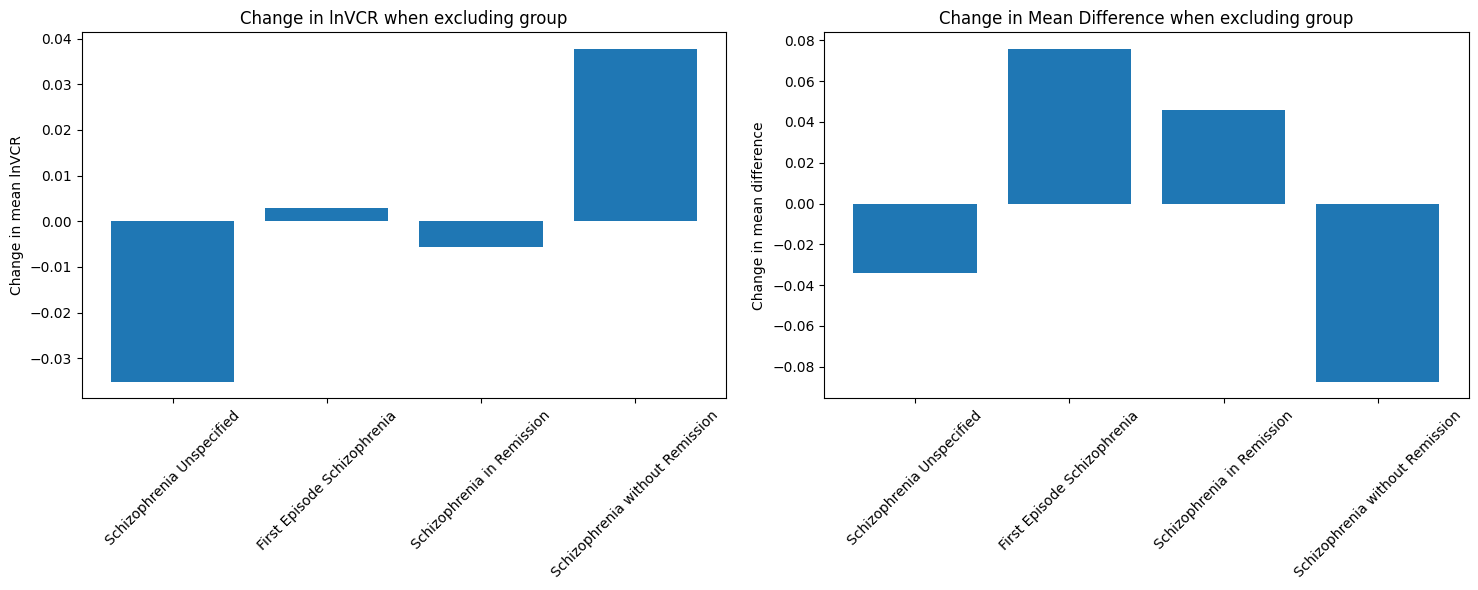


Detailed Results:
                    excluded_group  mean_lnVCR  lnVCR_change  mean_difference  \
0        Schizophrenia Unspecified      0.1281       -0.0352           0.5133   
1      First Episode Schizophrenia      0.1662        0.0030           0.6233   
2       Schizophrenia in Remission      0.1577       -0.0055           0.5933   
3  Schizophrenia without Remission      0.2010        0.0377           0.4600   

   diff_change  
0      -0.0342  
1       0.0758  
2       0.0458  
3      -0.0875  


In [ ]:
def comprehensive_sensitivity_analysis(means, sds, ns, control_mean, control_sd, control_n, groups):
    results = []

    # Leave-one-out analysis for both metrics
    for i in range(len(means)):
        # Remove one group
        temp_means = np.delete(means, i)
        temp_sds = np.delete(sds, i)
        temp_ns = np.delete(ns, i)

        # Calculate lnVCR
        cvs = temp_sds / temp_means
        cv_control = control_sd / control_mean
        vcr = cvs / cv_control
        lnvcr = np.log(vcr)

        # Calculate mean differences
        mean_diff = temp_means - control_mean

        # Store results
        results.append({
            'excluded_group': groups[i],
            'mean_lnVCR': np.mean(lnvcr),
            'lnVCR_change': np.mean(lnvcr) - np.mean(np.log(sds/means/(control_sd/control_mean))),
            'mean_difference': np.mean(mean_diff),
            'diff_change': np.mean(mean_diff) - np.mean(means - control_mean)
        })

    return pd.DataFrame(results)

# Run analysis
results = comprehensive_sensitivity_analysis(means, sds, ns, control_mean, control_sd, control_n, groups)

# Визуализация результатов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot for lnVCR sensitivity
ax1.bar(results['excluded_group'], results['lnVCR_change'])
ax1.set_title('Change in lnVCR when excluding group')
ax1.set_xticklabels(results['excluded_group'], rotation=45)
ax1.set_ylabel('Change in mean lnVCR')

# Plot for mean difference sensitivity
ax2.bar(results['excluded_group'], results['diff_change'])
ax2.set_title('Change in Mean Difference when excluding group')
ax2.set_xticklabels(results['excluded_group'], rotation=45)
ax2.set_ylabel('Change in mean difference')

plt.tight_layout()
plt.show()

print("\nDetailed Results:")
print(results.round(4))